# Analysis of VEHICLe Fragments Aligned to CDK2

In [1]:
%load_ext autoreload
%autoreload 2
%load_ext jupyter_black

In [2]:
import sys

sys.path.append("../")
sys.path.append("../../")

In [3]:
import pickle
import pandas as pd

import seaborn as sns

In [4]:
from utils import show

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


Load alignement data:

In [5]:
with open("CDK2-VEHICLe.pkl", "br") as fin:
    alignments = pickle.load(fin)

Convert nested index values into tuples:

In [6]:
d = {}
for outerKey, innerDict in alignments.items():
    for innerKey, values in innerDict.items():
        d[(outerKey, innerKey)] = values

In [7]:
df = pd.DataFrame.from_dict(d)
df = df.stack(level=0).swaplevel().sort_index()
df.index.names = ["lig", "idx"]
df

cfit  fragment  \
lig idx                        
CS1 0     0.812680      1046   
    1     0.909091         0   
    2     0.926380         1   
    3     0.725543      1047   
    4     0.782090        10   
...            ...       ...   
CS9 5414  0.782353       995   
    5415  0.822034       996   
    5416  0.779874       997   
    5417  0.868493       998   
    5418  0.792507       999   

                                                   fragmol      gfit  \
lig idx                                                                
CS1 0     <rdkit.Chem.rdchem.Mol object at 0x7fab42491450>  0.740634   
    1     <rdkit.Chem.rdchem.Mol object at 0x7fab424914f0>  0.818182   
    2     <rdkit.Chem.rdchem.Mol object at 0x7fab42491540>  0.828221   
    3     <rdkit.Chem.rdchem.Mol object at 0x7fab42491590>  0.663043   
    4     <rdkit.Chem.rdchem.Mol object at 0x7fab424915e0>  0.752239   
...                                                    ...       ...   
CS9 5414  <rdkit.Chem.rdchem.Mol object at 0x7fab420f2590>  0.670588   
    5415  <rdkit.Chem.rdchem.Mol object at 0x7fab420f25e0>  0.649718   
    5416  <rdkit.Chem.rdchem.Mol object at 0x7fab420f2630>  0.647799   
    5417  <rdkit.Chem.rdchem.Mol object at 0x7fab420f2680>  0.758904   
    5418  <rdkit.Chem.rdchem.Mol object at 0x7fab420f26d0>  0.757925   

              hfit                                               mol  
lig idx                                                               
CS1 0     0.487032  <rdkit.Chem.rdchem.Mol object at 0x7fab424914a0>  
    1     0.598930  <rdkit.Chem.rdchem.Mol object at 0x7fab424914a0>  
    2     0.564417  <rdkit.Chem.rdchem.Mol object at 0x7fab424914a0>  
    3     0.551630  <rdkit.Chem.rdchem.Mol object at 0x7fab424914a0>  
    4     0.465672  <rdkit.Chem.rdchem.Mol object at 0x7fab424914a0>  
...            ...                                               ...  
CS9 5414  0.438235  <rdkit.Chem.rdchem.Mol object at 0x7fab420f2860>  
    5415  0.686441  <rdkit.Chem.rdchem.Mol object at 0x7fab420f2860>  
    5416  0.389937  <rdkit.Chem.rdchem.Mol object at 0x7fab420f2860>  
    5417  0.578082  <rdkit.Chem.rdchem.Mol object at 0x7fab420f2860>  
    5418  0.654179  <rdkit.Chem.rdchem.Mol object at 0x7fab420f2860>  

[86704 rows x 6 columns]

In [8]:
df["gfit + hfit"] = df["gfit"] + df["hfit"]

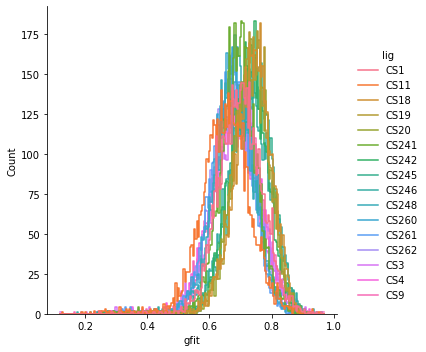

In [9]:
sns.displot(df, x="gfit", hue="lig", element="step", fill=False)

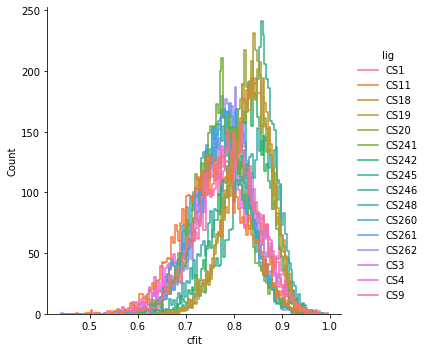

In [10]:
sns.displot(df, x="cfit", hue="lig", element="step", fill=False)

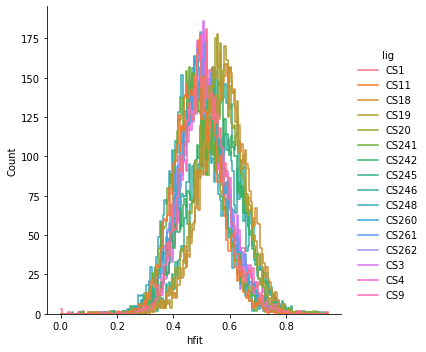

In [11]:
sns.displot(df, x="hfit", hue="lig", element="step", fill=False)

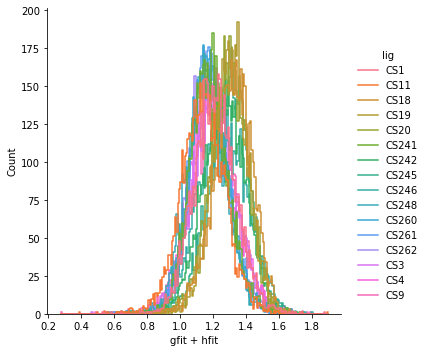

In [12]:
sns.displot(df, x="gfit + hfit", hue="lig", element="step", fill=False)

In [13]:
def getbest(df, lig, criteria="cfit", k=10):
    return df.query("lig == @lig").sort_values(criteria, ascending=False).head(k)


def showbest(df, lig, criteria="cfit", k=10):
    best = getbest(df, lig, criteria, k)

    for idx, row in best.iterrows():
        p = show(row.fragmol, row.mol)
        print(row[criteria])
        display(p)

In [14]:
df.index.levels[0]

Index(['CS1', 'CS11', 'CS18', 'CS19', 'CS20', 'CS241', 'CS242', 'CS245',
       'CS246', 'CS248', 'CS260', 'CS261', 'CS262', 'CS3', 'CS4', 'CS9'],
      dtype='object', name='lig')

In [15]:
showbest(df, "CS18", "gfit + hfit", k=2)

1.6842105263157894


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

1.6704980842911876


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol